In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import inf

In [2]:
df = pd.read_csv('multi_trial.csv')
df.head()

,Anode V,filament current,Circle,Bar 1,Bar 2,Bar 3,Bar 4,Bar 5,Straight line current
0,20,4.178,2.7529,2.6520,2.2501,1.9482,1.7466,1.5534,0.2468
1,25,4.178,3.0547,2.8593,2.4502,2.1493,1.9480,1.7466,0.2468
2,30,4.178,3.3526,3.1556,2.6521,2.3512,2.0489,1.8472,0.3476
3,35,4.178,3.6555,3.3526,2.8539,2.5512,2.1494,1.9481,0.3477
4,40,4.178,3.8572,3.5547,3.0550,2.6522,2.3512,2.0490,0.3477


In [3]:
df = df.drop(['filament current', 'Anode V' ], axis=1)

In [4]:
df = df.T
df.head()

,0,1,2,3,4,5,6
Circle,2.7529,3.0547,3.3526,3.6555,3.8572,4.0592,4.0592
Bar 1,2.6520,2.8593,3.1556,3.3526,3.5547,3.7564,3.9583
Bar 2,2.2501,2.4502,2.6521,2.8539,3.0550,3.2568,3.3531
Bar 3,1.9482,2.1493,2.3512,2.5512,2.6522,2.7530,2.9554
Bar 4,1.7466,1.9480,2.0489,2.1494,2.3512,2.4504,2.5517


In [5]:
distances = [inf, 0.1154, 0.1030, 0.0902, 0.0775, 0.0648, 0.06]
Anode_V = [20,25,30,35,40,45,50]
radius = [distance/2 for distance in distances]
df['radius'] = radius
df.head()

,0,1,2,3,4,5,6,radius
Circle,2.7529,3.0547,3.3526,3.6555,3.8572,4.0592,4.0592,inf
Bar 1,2.6520,2.8593,3.1556,3.3526,3.5547,3.7564,3.9583,0.05770
Bar 2,2.2501,2.4502,2.6521,2.8539,3.0550,3.2568,3.3531,0.05150
Bar 3,1.9482,2.1493,2.3512,2.5512,2.6522,2.7530,2.9554,0.04510
Bar 4,1.7466,1.9480,2.0489,2.1494,2.3512,2.4504,2.5517,0.03875


In [6]:
def y_calc(current, voltage):
    y = current**2
    return y

def x_calc(distance):
    x = 1/distance**2
    return x

0
1
2
3
4
5
6


<ipython-input-7-0dda0af06c62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col:Anode_V[col]}, inplace=True)
<ipython-input-7-0dda0af06c62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['y'] = df_temp.apply(lambda row: y_calc(row[Anode_V[col]], Anode_V[col]), axis=1)
<ipython-input-7-0dda0af06c62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

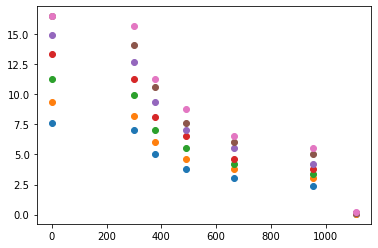

In [7]:
for col in df.columns:
    if col != 'radius':
        print(col)
        df_temp = df[['radius', col]]
        df_temp.rename(columns={col:Anode_V[col]}, inplace=True)
        df_temp['y'] = df_temp.apply(lambda row: y_calc(row[Anode_V[col]], Anode_V[col]), axis=1)
        df_temp['x'] = df_temp.apply(lambda row: x_calc(row['radius']), axis=1)
        df_temp.to_csv('anode_v_' + str(Anode_V[col]) + '.csv')
        plt.plot(df_temp['x'], df_temp['y'], 'o')


In [8]:
df_temp.head()

,radius,50,y,x
Circle,inf,4.0592,16.477105,0.000000
Bar 1,0.05770,3.9583,15.668139,300.364342
Bar 2,0.05150,3.3531,11.243280,377.038364
Bar 3,0.04510,2.9554,8.734389,491.639667
Bar 4,0.03875,2.5517,6.511173,665.972945


In [9]:
#fit all the data
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x + b

<ipython-input-10-5fba6610fc45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={col:Anode_V[col]}, inplace=True)
<ipython-input-10-5fba6610fc45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['y'] = df_temp.apply(lambda row: y_calc(row[Anode_V[col]], Anode_V[col]), axis=1)
<ipython-input-10-5fba6610fc45>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

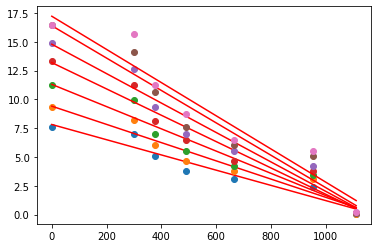

[-0.00660161603780473, -0.007906588642382101, -0.009645984223928691, -0.01142230386360595, -0.012764062150094667, -0.014047180814618258, -0.014391764214029837]
-0.010968499992352032


In [10]:
# fit them all on the same graph
slopes = []
for col in df.columns:
    if col != 'radius':
        # print(col)
        df_temp = df[['radius', col]]
        df_temp.rename(columns={col:Anode_V[col]}, inplace=True)
        df_temp['y'] = df_temp.apply(lambda row: y_calc(row[Anode_V[col]], Anode_V[col]), axis=1)
        df_temp['x'] = df_temp.apply(lambda row: x_calc(row['radius']), axis=1)
        popt, pcov = curve_fit(func, df_temp['x'], df_temp['y'])
        # print(popt)
        plt.plot(df_temp['x'], df_temp['y'], 'o')
        plt.plot(df_temp['x'], func(df_temp['x'], *popt), 'r-')
        #print slopes
        slopes.append(popt[0])
plt.show()
print(slopes)
print(np.average(slopes))

In [11]:
def m_e(slope, mean_rad, voltage, N, const):
    y = const * (mean_rad**2) * (voltage)
    y = y/N**2
    m_e = slope/y
    return m_e

In [19]:
#print in scientific notation
cm_arr = []
for idx, slope in enumerate(slopes):
    answer = (1/m_e(slope, 0.33, Anode_V[idx], 72, 2.7e12))
    cm_arr.append(answer)
    print(f'{answer:.2e}')

-1.72e+11
-1.79e+11
-1.76e+11
-1.74e+11
-1.78e+11
-1.82e+11
-1.97e+11


In [21]:
print("average charge to mass ratio = " + f'{np.average(cm_arr):.5e}')

average charge to mass ratio = -1.79695e+11
